# Reinforcement Learning
# TP 2 - The Exploration-Exploitation Dilemma

Student: Pierre-Louis Guhur

Functions are in `mab.py` and `linear_bandit.py`.

# 1. Stochastic Multi-Armed Bandits on Simulated Data

## 1.1 Bernoulli bandit models

**A multi-armed bandit model is a collection of arms:
                                ```MAB = {Arm1, Arm2, ...,ArmK}```
Start by defining your own Bernoulli bandit model with K arms of means $p_1, . . . , p_K$**

In [1]:
from arms import *
from mab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

K = 4
means = np.random.random(K)
MAB = [ArmBernoulli(m) for m in means]
assert(MAB[0].mean == means[0])

**Write two functions
              `[rew,draws]=UCB1(T,MAB,...)` and `[rew,draws]=TS(T,MAB,...)`
simulating a bandit game of length $T$ with the UCB1 and Thompson Sampling strategy on the bandit model MAB: `rew` and `draws` are the sequence of the $T$ rewards obtained and of the $T$ the arms drawn.**

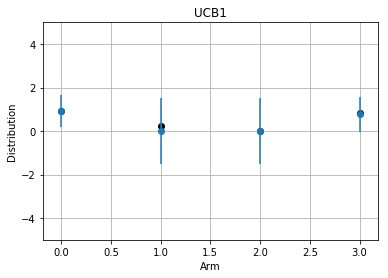

In [2]:
rew, draws, mu = UCB1(50, MAB, vis='all')

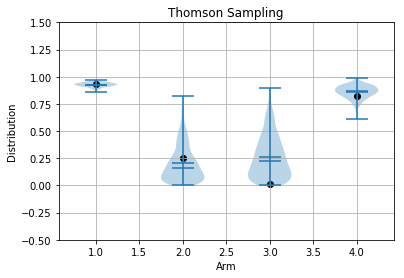

In [3]:
rew, draws, p_opt = TS(200, MAB)

**Based on many simulations, estimate the expected regret of UCB1 and Thompson Sampling and display regret curves.
You may also add the naive strategy that selects the empirical best arm at each round.**

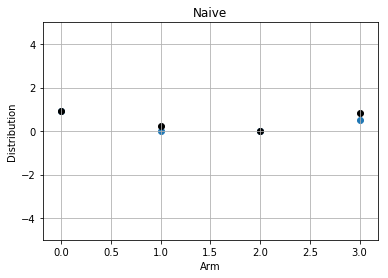

In [4]:
rew, draws, p_opt = naive(200, MAB)

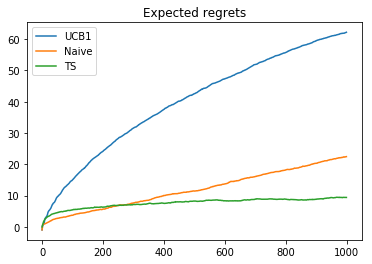

In [5]:
T = 1000
regrets_ucb1 = expected_regret(MAB, UCB1, T=T)
regrets_naive = expected_regret(MAB, naive, T=T)
regrets_ts = expected_regret(MAB, TS, T=T)

plt.figure()
plt.plot(range(T), regrets_ucb1, label="UCB1")
plt.plot(range(T), regrets_naive, label="Naive")
plt.plot(range(T), regrets_ts, label="TS")
plt.title("Expected regrets")
plt.legend()
plt.show()

***3.* In a Bernoulli bandit model, Lai and Robbins lower bound [Lai and Robbins, 1985] tells that:
$$\lim \inf_{T\rightarrow \infty} \frac{R_T}{\log T} \geq \sum_{a:p_a \lt p^*} \frac{p^∗−p_a}{kl(p_a, p^*)}  :=C(p)$$
  with $kl(x, y) = KL(B(x), B(y)) = x \log(x/y) + (1 − x) \log((1 − x)/(1 − y))$.
$C(p)$ may be called the complexity of the problem.
Add the “oracle” regret curve $t \mapsto C(p) \log(t)$ on your graph.**

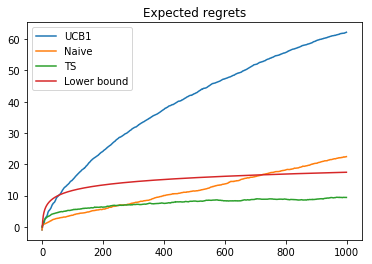

In [6]:
regret_curve = oracle(MAB) * np.log(range(1, T))

plt.figure()
plt.plot(range(T), regrets_ucb1, label="UCB1")
plt.plot(range(T), regrets_naive, label="Naive")
plt.plot(range(T), regrets_ts, label="TS")
plt.plot(range(1, T), regret_curve, label="Lower bound")
plt.title("Expected regrets")
plt.legend()
plt.show()

***Q1:* For two different Bernoulli bandit problems (that you specify), with different complexity, compare the regret of Thompson Sampling with that of UCB1. Add Lai and Robbins’ lower bound on your plots.**

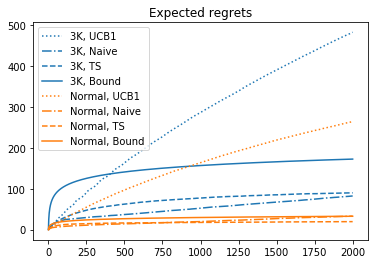

In [7]:
K = 10
T = 2000
means = np.random.random(3*K)
means_n = np.random.random(K)
problems = ["3K", "Normal"]
MABs = {problems[0]: [ArmBernoulli(m) for m in means],
        problems[1]: [ArmBernoulli(m) for m in means_n] }

plt.figure()

for pb in problems:
    regrets_ucb1 = expected_regret(MABs[pb], UCB1, T=T)
    regrets_ts = expected_regret(MABs[pb], TS, T=T)
    regrets_naive = expected_regret(MABs[pb], naive, T=T)
    regret_curve = oracle(MABs[pb]) * np.log(range(1, T))
    p = plt.plot(range(T), regrets_ucb1, label=f"{pb}, UCB1", linestyle=":")
    color = p[0].get_color()
    plt.plot(range(T), regrets_naive, label=f"{pb}, Naive", color=color, linestyle="-.")
    plt.plot(range(T), regrets_ts, label=f"{pb}, TS", color=color, linestyle="--")
    plt.plot(range(1, T), regret_curve, label=f"{pb}, Bound", color=color, linestyle="-")

plt.title("Expected regrets")
plt.legend()
plt.show()



We compare two MAB problems: in "3K", the number of arms is 3 times longer than in "normal". In "normal", the means are drawen from a normal distribution.

Quite interestingly, Lai and Robbins' lower bound is strongly reduced with the normal distribution. I think that one explanation is that the normal distribution maximises the entropy, thus the KL divergence (resp. the lower bound) is higher (resp. lower) than the uniform distribution.

Another explanation is that the normal distribution pushes more values close to zero. Hence, it is easier to improve to push the arms providing the best gains.

## 1.2 Non-parametric bandits (bounded rewards)
The UCB1 algorithm can be used in any bandit model such that each arm is bounded on [0,1], without modification.

**1. Using the other classes of arms, build a MAB with arms that are not only Bernoulli.
Why non-parametric? because we consider a MAB with different classes of arms (which can even be non parametric).**

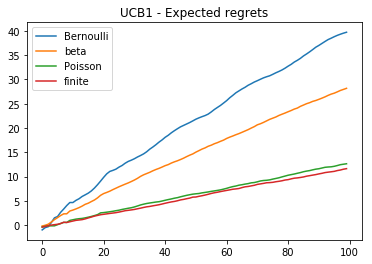

In [8]:
from sklearn.preprocessing import normalize

T = 100
MAB_np = {}
law = ["Bernoulli", "beta", "Poisson", "finite"]

means = np.random.random(K)
MAB_np[law[0]] = [ArmBernoulli(m) for m in means]

ab = np.random.random((K,2))
MAB_np[law[1]] = [ArmBeta(p[0], p[1]) for p in ab]
                      
lambdas = np.random.random(K)
MAB_np[law[2]] = [ArmBeta(l, 1) for l in lambdas]

support = np.linspace(0, 1, 10)
proba = np.random.random((K, len(support)))
normalize(proba, norm="l1", axis=1, copy=False)
MAB_np[law[3]] = [ArmFinite(support, proba[k]) for k in range(K)]
                         
                         
plt.figure()
for name in law:
    m = MAB_np[name]
    regrets_ucb1 = expected_regret(m, UCB1, T=T)
    p = plt.plot(range(T), regrets_ucb1, label=f"{name}")

plt.title("UCB1 - Expected regrets")
plt.legend()
plt.show()

**2. Propose an adaptation of Thompson Sampling to handle non-binary rewards and implement it together with UCB1 on your bandit model (see e.g., [Agrawal and Goyal, 2012]).**

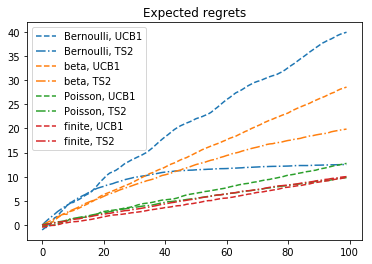

In [9]:
T = 100
regrets_ucb1 = expected_regret(MAB, UCB1, T=T)
regrets_ts = expected_regret(MAB, TS2, T=T)

plt.figure()
for name in law:
    m = MAB_np[name]
    regrets_ucb1 = expected_regret(m, UCB1, T=T)
    p = plt.plot(range(T), regrets_ucb1, label=f"{name}, UCB1", linestyle="--")
    color = p[0].get_color()
    
    regrets_ts2 = expected_regret(m, TS2, T=T)
    plt.plot(range(T), regrets_ts2, label=f"{name}, TS2", linestyle="-.", color=color)

plt.title("Expected regrets")
plt.legend()
plt.show()

***Q2:* Describe the proposed implementation of Thompson Sampling and present a regret curve in a bandit model that you specify. Does the notion of complexity still make sense? Suggestion: [Burnetas and Katehakis, 1996].**

The original implementation of Thompson Sampling could not manage the case where the reward is not binary. Instead, the suggestion of Agrawal and Goyal is to draw a binary number from a Bernoulli distribution with the probability equal to reward.

According to Burnetas and Katehakis, the Thompson Sampling, being an adaptive sampling, acknowledges a lower bound in $log(t)$ - but the closed-form of the bound is not given. Furthermore, the paper of Agrawal and Goyal provides an upper bound.

# 2 Linear Bandit on Real Data
In this section, we investigate a real-world application of linear bandits. In particular, we consider a recommendation problem where we need to discover the preferences of a user (cold start).

**Q3: Implement the LinUCB algorithm for the provided MovieLens problem. Compare the performance against the following algorithms (consider a horizon T = 6000):**

- **random: A random policy always chooses one of the candidate movies from the pool with equal probability.**
- **ε-greedy: it estimates each movie’s rating; then it chooses a random movie with probability ε and chooses the movie of the highest rating estimate with probability 1 − ε.**


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from linearmab_models import ToyLinearModel, ColdStartMovieLensModel
from linear_bandit import *


algorithms = [{"name":"3-LinUCB", 
               "stepper": lin_ucb, 
               "params": {"alpha":3, "lambda_":1e-3}},
              {"name": "0.3-Greedy", 
               "stepper": eps_greedy, 
               "params": {"eps":0.3, "lambda_":1e-3}}, 
              {"name": "0.1-Greedy", 
               "stepper": eps_greedy, 
               "params": {"eps":0.1, "lambda_":1e-3}}, 
              {"name":"random", 
               "stepper": rand_mab, 
               "params": {"lambda_":1e-3}}]
n_algorithms = len(algorithms)
alg_names = [a["name"] for a in algorithms]

## 2.1. Using a toy model

Simulating random: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


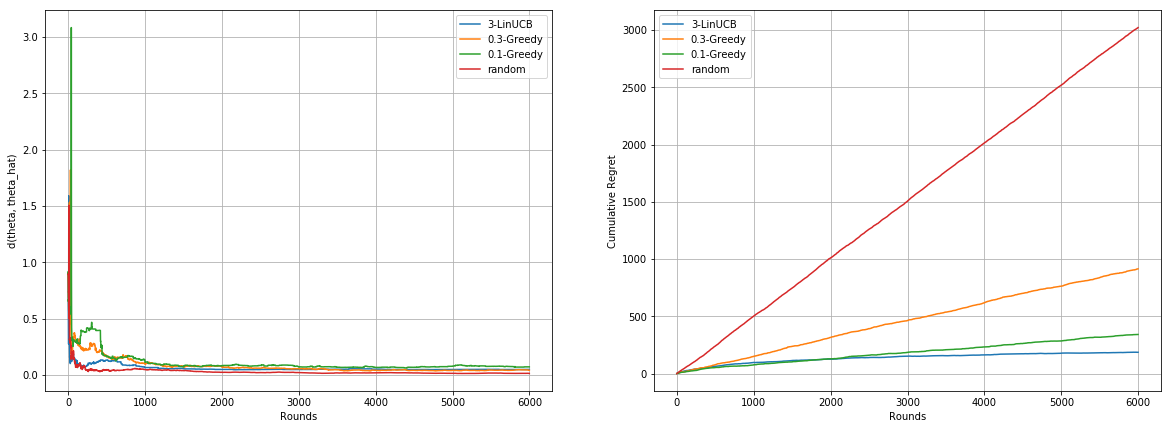

In [12]:
T = 6000
nb_simu = 1

random_state = np.random.randint(0, 24532523)
model = ToyLinearModel(n_features=8,
                        n_actions=20,
                        random_state=random_state,
                        noise=0.1)

toy_norms = np.zeros((n_algorithms, T))
toy_regret = np.zeros((n_algorithms, T))

for i, alg in enumerate(algorithms):
    regret = np.zeros((nb_simu, T))
    norm_dist = np.zeros((nb_simu, T))
    for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg['name'])):
         norm_dist[k, :], regret[k, :] = alg['stepper'](T, model, **alg['params'])
    toy_norms[i,:] = np.mean(norm_dist, axis=0)
    toy_regret[i,:] = np.mean(regret, axis=0)

plot_bandit(algorithms, toy_norms, toy_regret)

In [29]:
def tuning_alpha(search_space, model, T=100, N=5, lambda_=1e-3):
    M = len(search_space)
    all_norms = np.zeros(M)
    all_regrets = np.zeros(M)
    for i, alpha in enumerate(tqdm(search_space)):
        regret = np.zeros((N, T))
        norm_dist = np.zeros((N, T))
        for k in range(N):
             norm_dist[k, :], regret[k, :] = lin_ucb(T, model, alpha=alpha,lambda_=lambda_)
        all_norms[i] = np.mean(norm_dist, axis=0)[-1]
        all_regrets[i] = np.mean(regret, axis=0)[-1]
    return all_norms, all_regrets

search_space = np.arange(0.1, 10, 1)
norms, regrets = tuning_alpha(search_space, model, N=10)

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


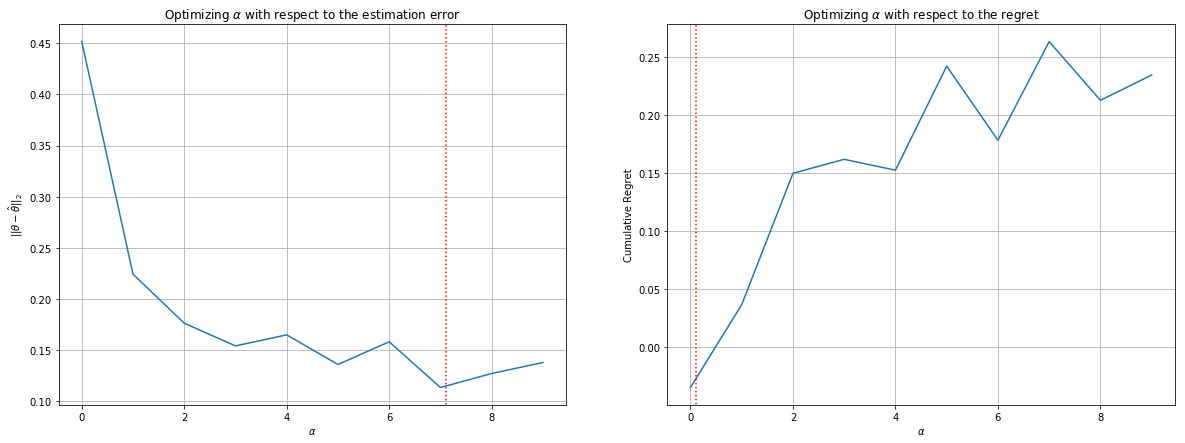

In [30]:
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(norms)
plt.axis('tight')
alpha_n = search_space[np.argmin(norms)]
plt.plot([alpha_n, alpha_n], [-10, 10], "r:")
plt.ylabel(r"$||\theta-\hat\theta||_2$")
plt.xlabel(r'$\alpha$')
plt.title(r"Optimizing $\alpha$ with respect to the estimation error")
plt.grid()


plt.subplot(122)
plt.plot(regrets)
plt.axis('tight')
alpha_r = search_space[np.argmin(regrets)]
plt.plot([alpha_r, alpha_r], [-10, 10], "r:")
plt.ylabel('Cumulative Regret')
plt.xlabel(r'$\alpha$')
plt.title(r"Optimizing $\alpha$ with respect to the regret")
plt.grid()
plt.show()

## 2.2 Cold start


Simulating random: 100%|██████████| 50/50 [00:08<00:00,  6.03it/s]


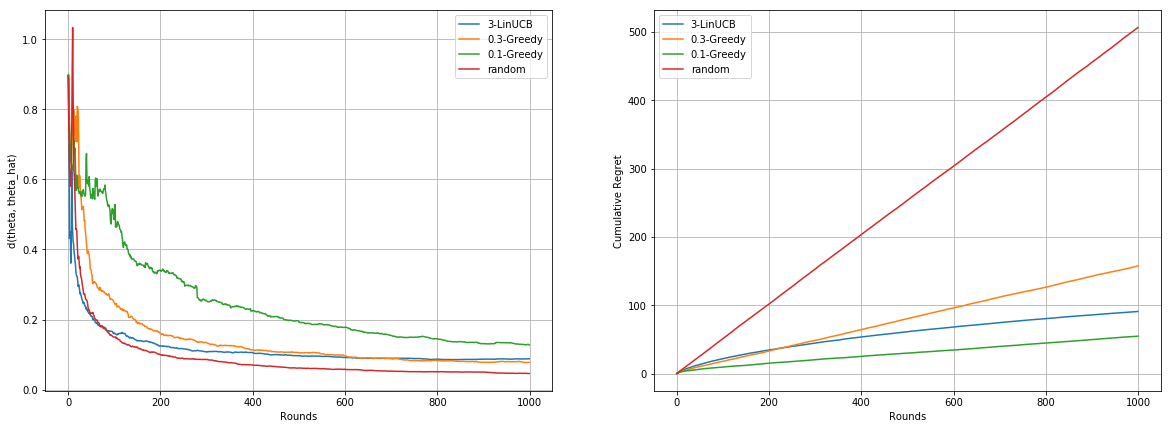

In [31]:
T = 1000
nb_simu = 50
random_state = np.random.randint(0, 24532523)
model_lens = ColdStartMovieLensModel(
    random_state=random_state,
    noise=0.1
)

cold_norms = np.zeros((n_algorithms, T))
cold_regret = np.zeros((n_algorithms, T))

for i, alg in enumerate(algorithms):
    regret = np.zeros((nb_simu, T))
    norm_dist = np.zeros((nb_simu, T))
    for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg['name'])):
         norm_dist[k, :], regret[k, :] = alg['stepper'](T, model, **alg['params'])
    cold_norms[i,:] = np.mean(norm_dist, axis=0)
    cold_regret[i,:] = np.mean(regret, axis=0)

plot_bandit(algorithms, cold_norms, cold_regret)

## Conclusion

The plots show excellent results: with only a few indications from the user, we are able to define its profile in an important feature spaces. 

$LinUCB$ accumulates more regrets at the beginning than a fine-tuned greedy algorithms, but in the long range (a few thousands rounds), it has a lower cumulative regret. However, In the context of film recommandations, having that many rounds is unlikely.

The random algorithm provides an excellent learning of $\theta$, but the highest cumulative regret. Indeed, the algorithm only explores, but does not exploit.